In [31]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
from bs4 import BeautifulSoup
from pyquery import PyQuery as pq
from collections import defaultdict 
from imdb import IMDb
import pandas as pd
import cPickle as pickle
import io 
import time
import requests

In [2]:
BOdict = pickle.load(io.open('BOdict.p', 'rb'))

In [3]:
BOdf = pd.DataFrame(BOdict).transpose()

In [4]:
limiteddf = BOdf.dropna(axis=1)

In [26]:
limiteddf

,close,gross,open,opening,opening theaters,rank,season,studio,title,year
0035429,11/17,47214,5/20,7849,1,406,0,Rialto,Went The Day Well?,2011
0049877,6/6,18297,5/24,9997,1,511,0,Rialto,A Pig Across Paris,2013
0054758,-,50039,6/12,10217,1,364,1,FDesk,Le combat dans l'île (1962),2009
0055082,9/17,27567,4/17,9515,1,405,0,Rialto,"Leon Morin, Priest",2009
0067409,-,35387,8/10,11264,1,445,1,Rialto,Max et les Ferrailleurs (Max and the Junkmen),2012
0069027,-,14104,6/8,1677,1,536,1,FDesk,We Won't Grow Old Together,2012
0075938,7/4,26816,1/13,1688,1,467,0,FDesk,"The Devil, Probably",2012
0086506,-,13261,4/4,1756,1,547,0,Icar.,One Day Pina Asked...,2014
0086928,10/5,13670,6/6,418,1,542,1,Icar.,Tosca's Kiss,2014
0090565,-,22039,7/20,5051,1,487,1,FDesk,Four Adventures of Reinette and Mirabelle,2011


In [6]:
limiteddf['gross'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
limiteddf['opening'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
limiteddf['opening theaters'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2859: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
limiteddf['gross'] = limiteddf['gross'].astype(float)
limiteddf['opening'] = limiteddf['opening'].astype(float)

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
limiteddf['opening theaters'] = limiteddf['opening theaters'].astype(float)

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


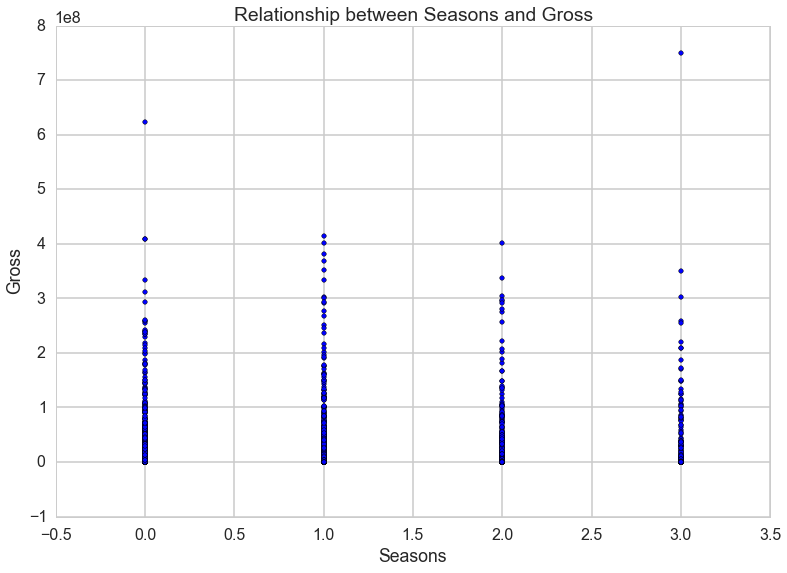

In [34]:
plt.scatter(limiteddf.season, limiteddf.gross)
plt.xlabel("Seasons")
plt.ylabel("Gross")
plt.title("Relationship between Seasons and Gross")

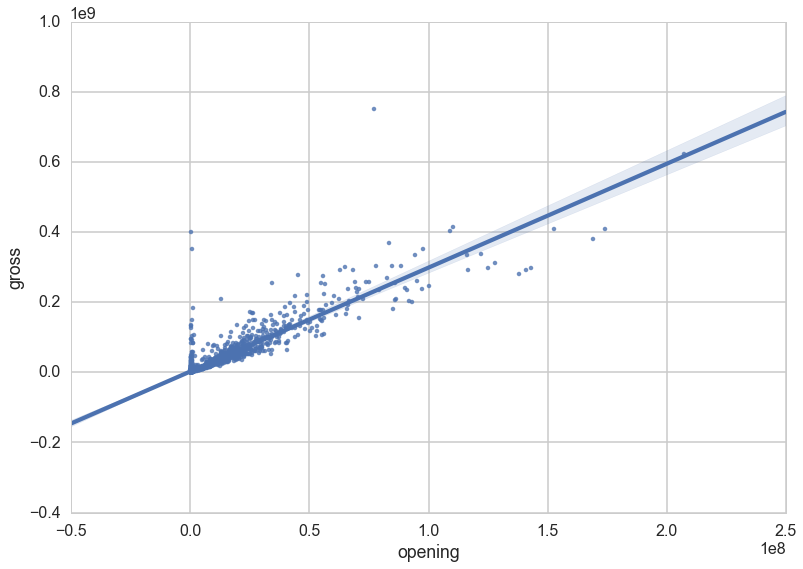

In [40]:
sns.regplot(y="gross", x="opening", data=limiteddf, fit_reg = True)

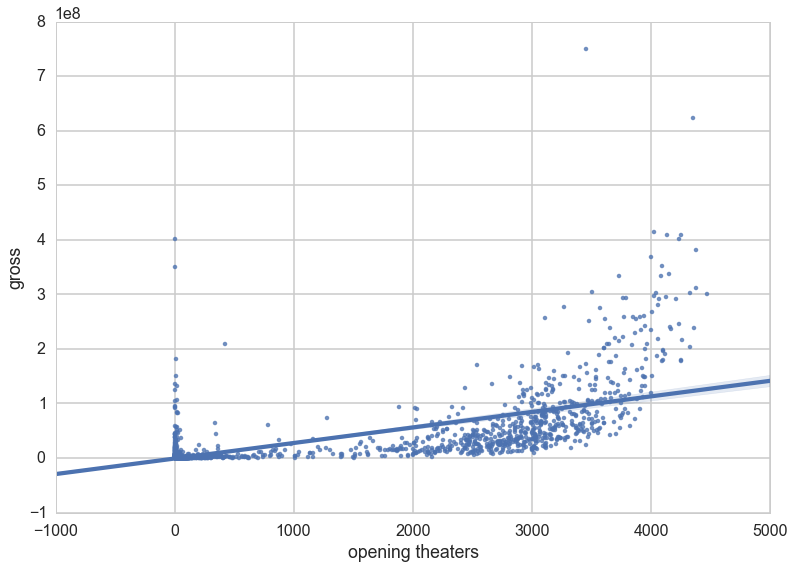

In [41]:
sns.regplot(y="gross", x="opening theaters", data=limiteddf, fit_reg = True)

In [42]:
studiodf = limiteddf.groupby('studio') 

In [51]:
studioslist = studiodf['title'].count()

In [53]:
studioslist.sort(ascending=False)

In [60]:
if "Fox" in (studioslist[:2]):
    print "yes"

In [61]:
limiteddf['studio_main'] = 'Other'

/Users/rohanmazumdar/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [65]:
limiteddf

,close,gross,open,opening,opening theaters,rank,season,studio,title,year,studio_main
0035429,11/17,47214,5/20,7849,1,406,0,Rialto,Went The Day Well?,2011,Other
0049877,6/6,18297,5/24,9997,1,511,0,Rialto,A Pig Across Paris,2013,Other
0054758,-,50039,6/12,10217,1,364,1,FDesk,Le combat dans l'île (1962),2009,Other
0055082,9/17,27567,4/17,9515,1,405,0,Rialto,"Leon Morin, Priest",2009,Other
0067409,-,35387,8/10,11264,1,445,1,Rialto,Max et les Ferrailleurs (Max and the Junkmen),2012,Other
0069027,-,14104,6/8,1677,1,536,1,FDesk,We Won't Grow Old Together,2012,Other
0075938,7/4,26816,1/13,1688,1,467,0,FDesk,"The Devil, Probably",2012,Other
0086506,-,13261,4/4,1756,1,547,0,Icar.,One Day Pina Asked...,2014,Other
0086928,10/5,13670,6/6,418,1,542,1,Icar.,Tosca's Kiss,2014,Other
0090565,-,22039,7/20,5051,1,487,1,FDesk,Four Adventures of Reinette and Mirabelle,2011,Other
